In [ ]:
import pandas as pd
import numpy as np
import os
path_in = os.path.join("Data")  # parent directory
np.random.seed(42)

import sys
sys.path.append(os.path.abspath("../src/RC_Model"))  # now src is on sys.path

from models import * 
from simulate import *
from plot import *
from train import *
from split_dataset import *

%load_ext autoreload
%autoreload 2

# === Paths ===
###################### ======================== Case Study 1 ======================= ###########################

file_path = os.path.join(path_in, "dataset2.xlsx")
cs1 = pd.read_excel(file_path)

cs1["INDOOR_TEMP"] = cs1[["RTD31", "RTD34", "RTD37", "RTD40", "RTD41"]].mean(axis=1)
# Rename columns
rename_mapping = {
        'Tout': 'OUTDOOR_TEMP',
        'PhRad_actual_power': 'PHI_H',
        'SolGlob': 'PYRANOMETER'
    }
cs1 = cs1.rename(columns=rename_mapping)
# Convert 't' to datetime and set as index

cs1['Time'] = pd.to_datetime(cs1['Time'])
cs1 = cs1.set_index('Time')
cs1_surface_area = 100  # m² 
cs1 = cs1.iloc[0:960]

train_cs1, val_cs1, test_cs1 = split_dataset(cs1, testing_days=3, val_split=0.3)

###################### ======================== Case Study 2 ======================= ###########################

file_path = os.path.join(path_in, "dataset4.xlsx")
cs2 = pd.read_excel(file_path)
# Rename columns
rename_mapping = {
        'T_ext': 'OUTDOOR_TEMP',
        'heating_total [kW]': 'PHI_H',
        'GHI': 'PYRANOMETER',
        'T_int': 'INDOOR_TEMP'
    }
cs2 = cs2.rename(columns=rename_mapping)
cs2['PHI_H']=cs2['PHI_H']*1000
# Convert 't' to datetime and set as index

cs2['Time'] = pd.to_datetime(cs2['Time'])
cs2 = cs2.set_index('Time')
cs2 = cs2.resample("30min").mean()
cs2_surface_area = 2100  # m² 
cs2 = cs2.iloc[0:960]

train_cs2, val_cs2, test_cs2 = split_dataset(cs2, testing_days=3, val_split=0.3)

###################### ======================== Case Study 3 ======================= ###########################

file_path = os.path.join(path_in, "dataset5-cella.xlsx")
cs3 = pd.read_excel(file_path)
cs3["INDOOR_TEMP"] = cs3[["ra_zone_air_temp1_C", "ra_zone_air_temp2_C"]].mean(axis=1)
cs3['PHI_H']=cs3['ra_sup_air_flow_cmh']/3600*1.2*(cs3['ra_sup_air_temp_C']-cs3['INDOOR_TEMP'])*1005
# Rename columns
rename_mapping = {
        'oat_C': 'OUTDOOR_TEMP',
        'global_irradiance_Wm2': 'PYRANOMETER',
    }
cs3 = cs3.rename(columns=rename_mapping)
# Convert 't' to datetime and set as index

cs3['time'] = pd.to_datetime(cs3['time'])
cs3 = cs3.set_index('time')
cs3 = cs3.resample("30min").mean()
cs3=cs3[cs3.index>'2020-07-21']
cs3_surface_area = 57  # m² 
cs3= cs3.iloc[0:960]

train_cs3, val_cs3, test_cs3 = split_dataset(cs3, testing_days=3, val_split=0.3)

###################### ======================== Case Study 4 ======================= ###########################

file_path = os.path.join(path_in, "dataset5-cellb.xlsx")
cs4 = pd.read_excel(file_path)
cs4["INDOOR_TEMP"] = cs4[["rb_zone_air_temp1_C", "rb_zone_air_temp2_C"]].mean(axis=1)
cs4['PHI_H']=cs4['rb_sup_air_flow_cmh']/3600*1.2*(cs4['rb_sup_air_temp_C']-cs4['INDOOR_TEMP'])*1005
# Rename columns
rename_mapping = {
        'oat_C': 'OUTDOOR_TEMP',
        'global_irradiance_Wm2': 'PYRANOMETER',
    }
cs4 = cs4.rename(columns=rename_mapping)
# Convert 't' to datetime and set as index

cs4['time'] = pd.to_datetime(cs4['time'])
cs4 = cs4.set_index('time')
cs4 = cs4.resample("30min").mean()
cs4=cs4[cs4.index>'2020-07-21']
cs4_surface_area = 57  # m² 
cs4= cs4.iloc[0:960]

train_cs4, val_cs4, test_cs4 = split_dataset(cs4, testing_days=3, val_split=0.3)

## 1R1C


=== Best result ===
Best Trial Validation #: 13
Best Trial Training #: 0
Best RMSE Validation: 0.2818
RMSE Training of Best Validation : 0.0226
Best RMSE Training: 0.0226
Best initialization Validation: {'R_in_a': 0.4407123412458617, 'C_in': 61897079.18754464, 'Ain': 14.855812126427994}
Best initialization Training: {'R_in_a': 0.37516557872851514, 'C_in': 475406438.8985482, 'Ain': 21.96008626040034}
Best parameters Validation: {'R_in_a': 0.013474304905878571, 'C_in': 23043303.488275442, 'Ain': 3.472482194814199, 'fh': 1, 'Objective': 0.022632530669965477, 'Solve_time': 0.026179075241088867}
Best parameters Training: {'R_in_a': 0.013474304904944931, 'C_in': 23043303.48793064, 'Ain': 3.472482198407022, 'fh': 1, 'Objective': 0.022632530669962278, 'Solve_time': 0.03642702102661133}
Solve Time: 4.151942014694214


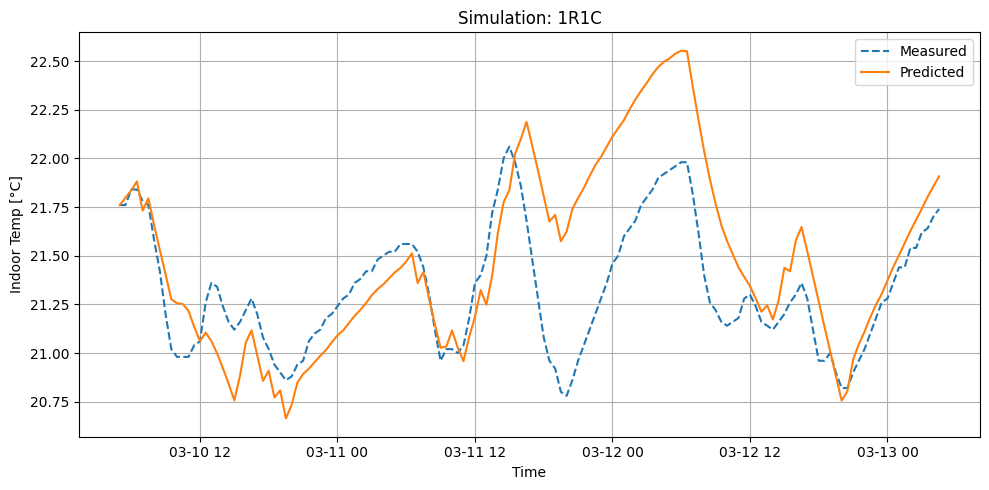


=== Best result ===
Best Trial Validation #: 14
Best Trial Training #: 16
Best RMSE Validation: 1.3382
RMSE Training of Best Validation : 0.7585
Best RMSE Training: 0.7585
Best initialization Validation: {'R_in_a': 0.11995338079694944, 'C_in': 3376814098.864876, 'Ain': 594.0331705551831}
Best initialization Training: {'R_in_a': 0.36369323941905607, 'C_in': 9717849045.126886, 'Ain': 606.3418333662352}
Best parameters Validation: {'R_in_a': 0.0004278483857984517, 'C_in': 2477035460.291147, 'Ain': 630.0000019495444, 'fh': 1, 'Objective': 0.7585099308237433, 'Solve_time': 0.0257260799407959}
Best parameters Training: {'R_in_a': 0.0004278483857984516, 'C_in': 2477035460.2911377, 'Ain': 630.0000019495444, 'fh': 1, 'Objective': 0.7585099308237265, 'Solve_time': 0.03138089179992676}
Solve Time: 0.9698023796081543


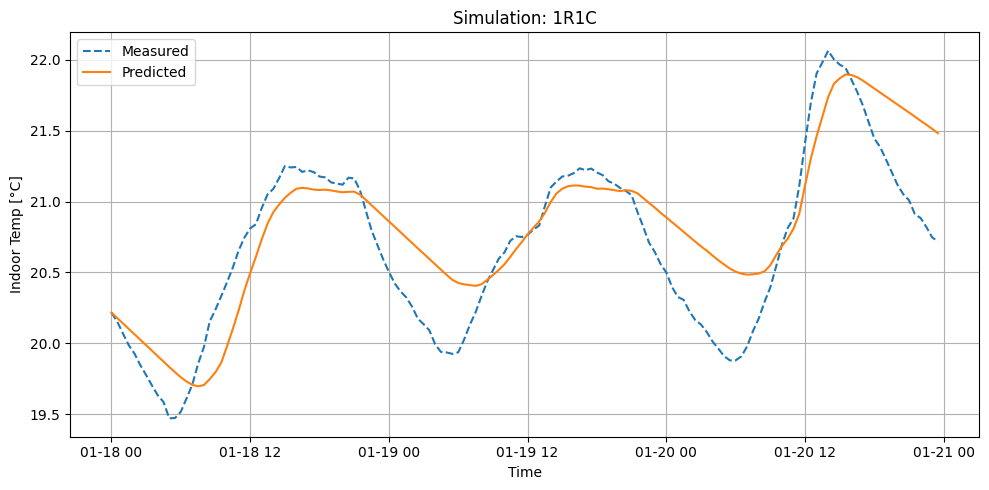


=== Best result ===
Best Trial Validation #: 20
Best Trial Training #: 17
Best RMSE Validation: 1.0638
RMSE Training of Best Validation : 1.3413
Best RMSE Training: 1.3413
Best initialization Validation: {'R_in_a': 0.9410539985093852, 'C_in': 9539331841.448872, 'Ain': 15.644266208379445}
Best initialization Training: {'R_in_a': 0.5076107221741402, 'C_in': 5769461942.378964, 'Ain': 8.422560046608751}
Best parameters Validation: {'R_in_a': 0.011966263800926226, 'C_in': 51157094.84364411, 'Ain': 5.347694287749199, 'fh': 1, 'Objective': 1.3413199987817936, 'Solve_time': 3.403963088989258}
Best parameters Training: {'R_in_a': 0.01196626380092592, 'C_in': 51157094.843643315, 'Ain': 5.347694287749262, 'fh': 1, 'Objective': 1.3413199987817839, 'Solve_time': 0.11237907409667969}
Solve Time: 9.841737508773804


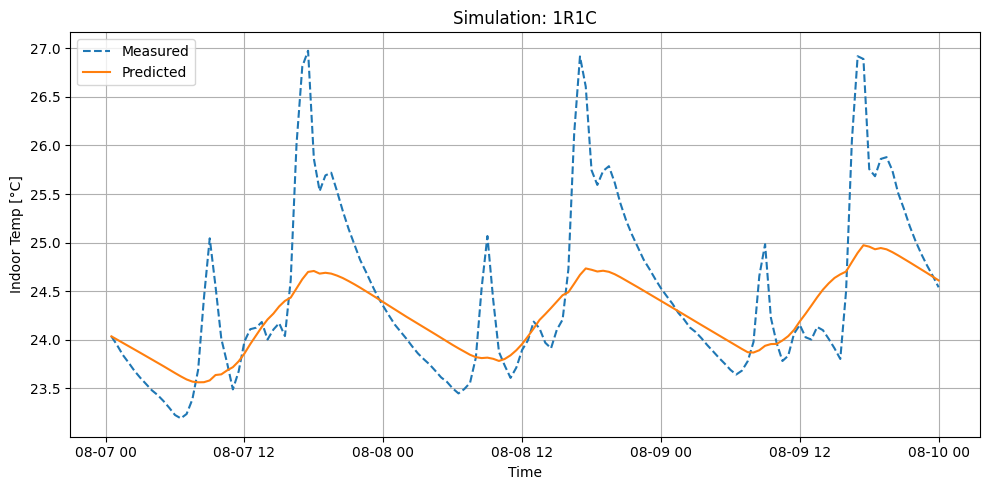


=== Best result ===
Best Trial Validation #: 26
Best Trial Training #: 5
Best RMSE Validation: 1.3543
RMSE Training of Best Validation : 0.8736
Best RMSE Training: 0.3822
Best initialization Validation: {'R_in_a': 0.3808664884802065, 'C_in': 3129673718.6554675, 'Ain': 8.604126885460918}
Best initialization Training: {'R_in_a': 0.045582851058774666, 'C_in': 2328524492.6441684, 'Ain': 9.279680608864851}
Best parameters Validation: {'R_in_a': 0.015812890321243334, 'C_in': 95800445.46832909, 'Ain': 5.1413268853325595, 'fh': 1, 'Objective': 0.8736298761221533, 'Solve_time': 0.04404473304748535}
Best parameters Training: {'R_in_a': 0.11459285374619062, 'C_in': 13263956.441059196, 'Ain': 2.802206568273709, 'fh': 1, 'Objective': 0.3822046991788473, 'Solve_time': 0.0339810848236084}
Solve Time: 4.024083852767944


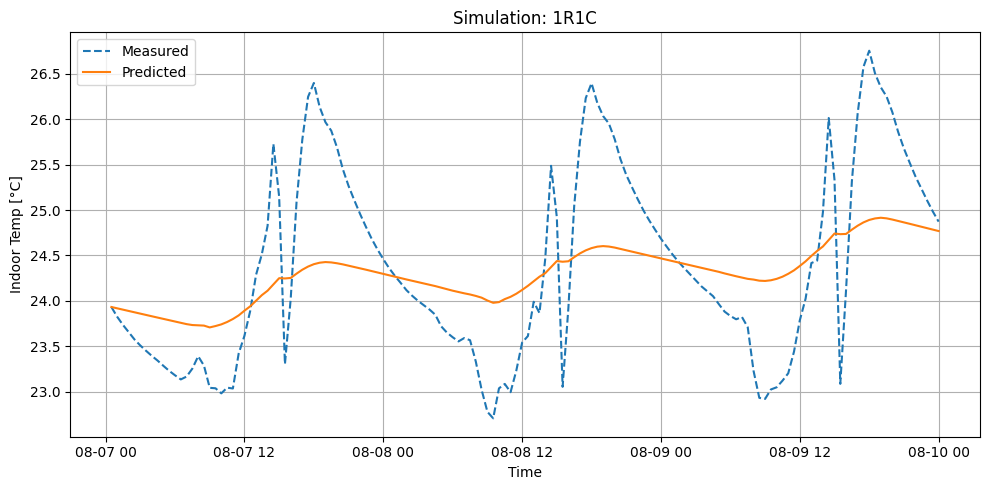

In [2]:
bounds_cs1 = {
        "R_in_a": (0.001, 1),
        "C_in": (1e6, 5e8),
        "Ain": (0.001, 0.3 * cs1_surface_area)
    }
bounds_cs2 = {
        "R_in_a": (0.0001, 1),
        "C_in": (1e6, 1e10),
        "Ain": (0.001, 0.3 * cs2_surface_area)
    }
bounds_cs3 = {
        "R_in_a": (0.01, 1),
        "C_in": (1e6, 1e10),
        "Ain": (0.001, 0.3 * cs3_surface_area)
    }
bounds_cs4 = {
        "R_in_a": (0.01, 1),
        "C_in": (1e6, 5e9),
        "Ain": (0.001, 0.3 * cs4_surface_area)
    }

###################### ======================== Case Study 1 ======================= ###########################

model_1r1c_cs1, parameters_1r1c_cs1, best_initialization_1r1c_cs1, validation_pred_1r1c_cs1, initialize_testing_1r1c_cs1, all_trials_1r1c_cs1 = train_greybox_model_with_validation_process(
    train_df=train_cs1, val_df=val_cs1, model_type="1R1C", bounds=bounds_cs1, 
    num_trials=30, deltaT=1800, show_plot=False, log=False)

initialize_testing_1r1c_cs1['Tin'] = test_cs1['INDOOR_TEMP'].iloc[0] # The initialization must be 

# --- Run Simulation for Testing ---
testing_performance_1r1c_cs1, testing_df_1r1c_cs1 = simulate_and_evaluate(
        val_df=test_cs1, param_dict=parameters_1r1c_cs1, model_type="1R1C",
        initializations=initialize_testing_1r1c_cs1, show_plot=True
    )

# ###################### ======================== Case Study 2 ======================= ###########################

model_1r1c_cs2, parameters_1r1c_cs2, best_initialization_1r1c_cs2, validation_pred_1r1c_cs2, initialize_testing_1r1c_cs2, all_trials_1r1c_cs2 = train_greybox_model_with_validation_process(
    train_df=train_cs2, val_df=val_cs2, model_type="1R1C", bounds=bounds_cs2, 
    num_trials=30, deltaT=1800, show_plot=False, log=False)
initialize_testing_1r1c_cs2['Tin'] = test_cs2['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
testing_performance_1r1c_cs2, testing_df_1r1c_cs2  = simulate_and_evaluate(
        val_df=test_cs2, param_dict=parameters_1r1c_cs2, model_type="1R1C", 
        initializations=initialize_testing_1r1c_cs2, show_plot=True
    )

# ###################### ======================== Case Study 3 ======================= ###########################

model_1r1c_cs3, parameters_1r1c_cs3, best_initialization_1r1c_cs3, validation_pred_1r1c_cs3, initialize_testing_1r1c_cs3, all_trials_1r1c_cs3 = train_greybox_model_with_validation_process(
    train_df=train_cs3, val_df=val_cs3, model_type="1R1C", bounds=bounds_cs3, 
    num_trials=30, deltaT=1800, show_plot=False, log=False)
initialize_testing_1r1c_cs3['Tin'] = test_cs3['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
testing_performance_1r1c_cs3, testing_df_1r1c_cs3  = simulate_and_evaluate(
        val_df=test_cs3, param_dict=parameters_1r1c_cs3, model_type="1R1C", 
        initializations=initialize_testing_1r1c_cs3, show_plot=True
    )

###################### ======================== Case Study 4 ======================= ###########################

model_1r1c_cs4, parameters_1r1c_cs4, best_initialization_1r1c_cs4, validation_pred_1r1c_cs4, initialize_testing_1r1c_cs4, all_trials_1r1c_cs4 = train_greybox_model_with_validation_process(
    train_df=train_cs4, val_df=val_cs4, model_type="1R1C", bounds=bounds_cs4, 
    num_trials=30, deltaT=1800, show_plot=False, log=False)
initialize_testing_1r1c_cs4['Tin'] = test_cs4['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
testing_performance_1r1c_cs4, testing_df_1r1c_cs4  = simulate_and_evaluate(
        val_df=test_cs4, param_dict=parameters_1r1c_cs4, model_type="1R1C", 
        initializations=initialize_testing_1r1c_cs4, show_plot=True
    )

# 2R2C


=== Best result ===
Best Trial Validation #: 13
Best Trial Training #: 20
Best RMSE Validation: 0.2249
RMSE Training of Best Validation : 0.0199
Best RMSE Training: 0.0198
Best initialization Validation: {'R_e_a': 0.5588458454860692, 'R_in_e': 0.4247977872377293, 'C_in': 453270838.1622732, 'C_e': 56487543.67076952, 'Ain': 14.779260503621483, 'Ae': 0.3415979893778046, 'fh': 0.46866064199412627}
Best initialization Training: {'R_e_a': 0.6984635523057254, 'R_in_e': 0.5365602699777763, 'C_in': 155454280.52687755, 'C_e': 407083714.8337674, 'Ain': 20.542250445443823, 'Ae': 4.879345563407394, 'fh': 0.9109271844938425}
Best parameters Validation: {'R_in_e': 0.0479104946428523, 'R_e_a': 0.0014047818366848916, 'C_in': 6268255.015902774, 'C_e': 1000009.461353823, 'Ain': 0.3900818488612139, 'Ae': 12.371822462440527, 'fh': 0.2562735848415334, 'Objective': 0.01985789497649367, 'Solve_time': 0.33331894874572754}
Best parameters Training: {'R_in_e': 0.0012273623410018904, 'R_e_a': 0.01265609885497407

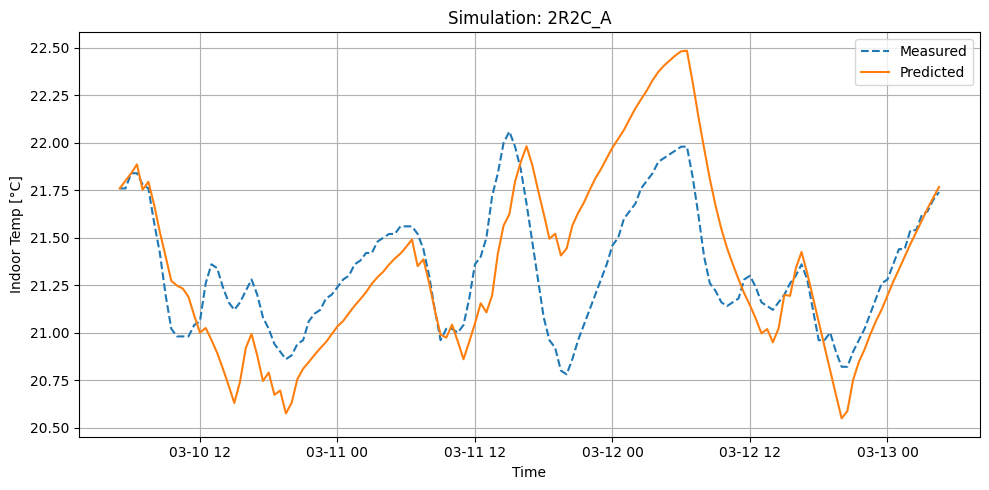


=== Best result ===
Best Trial Validation #: 22
Best Trial Training #: 4
Best RMSE Validation: 1.4158
RMSE Training of Best Validation : 0.8603
Best RMSE Training: 0.6268
Best initialization Validation: {'R_e_a': 0.5746858766233219, 'R_in_e': 0.8419078623698929, 'C_in': 1398583993.8862686, 'C_e': 7952877851.287042, 'Ain': 127.02601000275901, 'Ae': 103.10408034945098, 'fh': 0.16426579793099294}
Best initialization Training: {'R_e_a': 0.19269287429926646, 'R_in_e': 0.04134818195834563, 'C_in': 1690181695.6585734, 'C_e': 2786624799.980554, 'Ain': 111.51742808386622, 'Ae': 55.88350756441128, 'fh': 0.12063587110060081}
Best parameters Validation: {'R_in_e': 0.0005511063793214026, 'R_e_a': 0.0004999900015233332, 'C_in': 1515140586.1389763, 'C_e': 3526748.407291209, 'Ain': 221.02161525761633, 'Ae': 0.0011143983319117597, 'fh': -7.278299619357575e-09, 'Objective': 0.860299473507626, 'Solve_time': 4.818127870559692}
Best parameters Training: {'R_in_e': 0.9997885673777447, 'R_e_a': 0.9998393908

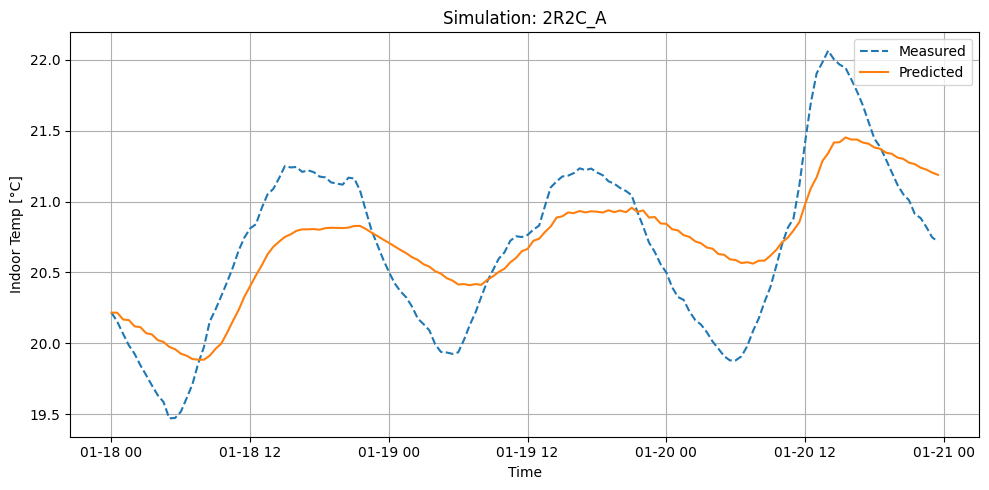


=== Best result ===
Best Trial Validation #: 2
Best Trial Training #: 22
Best RMSE Validation: 0.9658
RMSE Training of Best Validation : 1.2489
Best RMSE Training: 0.5509
Best initialization Validation: {'R_e_a': 0.019092073637019667, 'R_in_e': 0.8722517850352073, 'C_in': 466398549.82938814, 'C_e': 284740925.87665844, 'Ain': 11.913032437470978, 'Ae': 15.774816918750576, 'fh': 0.7072386343133986}
Best initialization Training: {'R_e_a': 0.1725076065624552, 'R_in_e': 0.27303501919284956, 'C_in': 14103384.890996033, 'C_e': 457577909.247447, 'Ain': 2.0144257663385225, 'Ae': 9.858855214818218, 'fh': 0.274055220687206}
Best parameters Validation: {'R_in_e': 0.001809917899947483, 'R_e_a': 0.0009999906776961781, 'C_in': 99441062.32476503, 'C_e': 303400474.2809001, 'Ain': 13.736679495362559, 'Ae': 0.0010165338357834446, 'fh': 0.9999999776337283, 'Objective': 1.2489472267293695, 'Solve_time': 0.11738801002502441}
Best parameters Training: {'R_in_e': 0.0020319561023093135, 'R_e_a': 0.005662675377

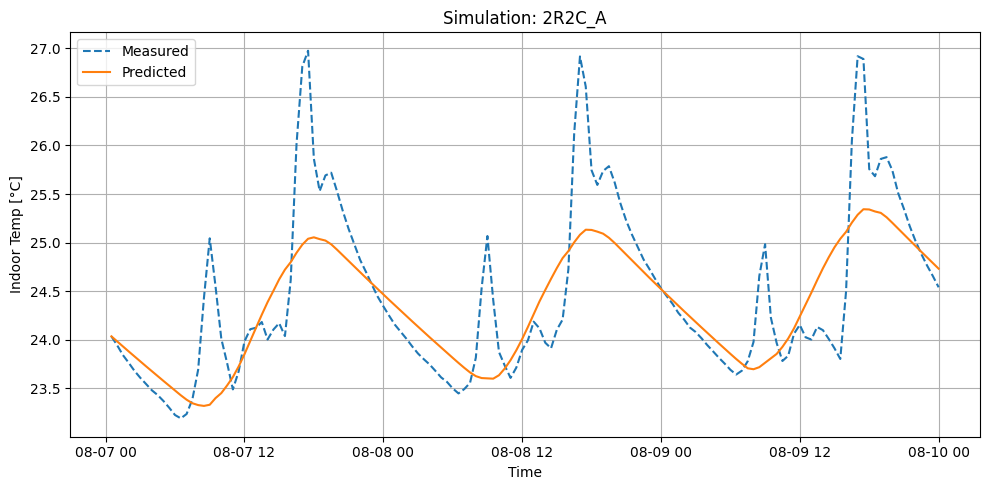


=== Best result ===
Best Trial Validation #: 3
Best Trial Training #: 28
Best RMSE Validation: 0.6027
RMSE Training of Best Validation : 0.2572
Best RMSE Training: 0.2222
Best initialization Validation: {'R_e_a': 0.9876803399886503, 'R_in_e': 0.9441152803469266, 'C_in': 20673978.872884445, 'C_e': 353082011.0853285, 'Ain': 15.821820979490466, 'Ae': 3.0886578263322755, 'fh': 0.5679452305526295}
Best initialization Training: {'R_e_a': 0.6881978365785125, 'R_in_e': 0.06876922204606674, 'C_in': 151180819.9064613, 'C_e': 354377872.2339955, 'Ain': 1.152627934514527, 'Ae': 9.955532698554094, 'fh': 0.34588305695295674}
Best parameters Validation: {'R_in_e': 0.002922242893768342, 'R_e_a': 0.007107881227366338, 'C_in': 8859910.199807968, 'C_e': 211823489.31886578, 'Ain': 2.9184712915197024, 'Ae': 4.130095677453519, 'fh': 0.9945773736175662, 'Objective': 0.257223280645129, 'Solve_time': 0.2119441032409668}
Best parameters Training: {'R_in_e': 0.0013584491664787321, 'R_e_a': 0.035476456608048844, 

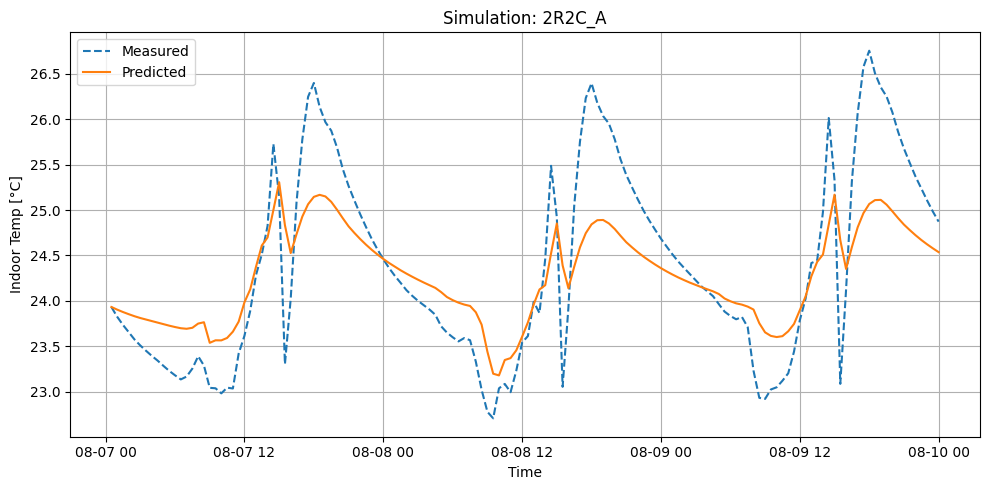

In [3]:
# --- Bounds ---
bounds_cs1 = {
    "R_e_a": (0.001, 1),
    "R_in_e": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.001, 0.3 * cs1_surface_area),
    "Ae": (0.001, 0.3 * cs1_surface_area),
    "fh": (0,1)
}
bounds_cs2 = {
    "R_e_a": (0.0005, 1),
    "R_in_e": (0.0005, 1),
    "C_in": (1e6, 1e10),
    "C_e": (1e6, 1e10),
    "Ain": (0.001, 0.3 * cs2_surface_area),
    "Ae": (0.001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}
bounds_cs3 = {
    "R_e_a": (0.001, 1),
    "R_in_e": (0.001, 1),
    "C_in": (5e6, 5e8),
    "C_e": (5e6, 5e8),
    "Ain": (0.001, 0.3 * cs3_surface_area),
    "Ae": (0.001, 0.3 * cs3_surface_area),
    "fh": (0,1)
}
bounds_cs4 = {
    "R_e_a": (0.001, 1),
    "R_in_e": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.001, 0.3 * cs4_surface_area),
    "Ae": (0.001, 0.3 * cs4_surface_area),
    "fh": (0,1)
}

###################### ======================== Case Study 1 ======================= ###########################

model_2r2c_cs1, parameters_2r2c_cs1, best_initialization,validation_pred_2r2c_cs1, initialize_testing_2r2c_cs1, all_trials_2r2c_cs1 = train_greybox_model_with_validation_process(
    train_df=train_cs1, val_df=val_cs1, model_type="2R2C_A", bounds=bounds_cs1, 
    num_trials=30, deltaT=1800, show_plot=False, log=False)

initialize_testing_2r2c_cs1['Tin'] = test_cs1['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
testing_performance_2r2c_cs1, testing_df_2r2c_cs1 = simulate_and_evaluate(
        val_df=test_cs1, param_dict=parameters_2r2c_cs1, model_type="2R2C_A",
        initializations=initialize_testing_2r2c_cs1, show_plot=True
    )

###################### ======================== Case Study 2 ======================= ###########################

model_2r2c_cs2, parameters_2r2c_cs2, best_initialization_2r2c_cs2,validation_pred_2r2c_cs2, initialize_testing_2r2c_cs2, all_trials_2r2c_cs2 = train_greybox_model_with_validation_process(
    train_df=train_cs2, val_df=val_cs2, model_type="2R2C_A", bounds=bounds_cs2, 
    num_trials=30, deltaT=1800, show_plot=False, log=False)

initialize_testing_2r2c_cs2['Tin'] = test_cs2['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
testing_performance_2r2c_cs2, testing_df_2r2c_cs2 = simulate_and_evaluate(
        val_df=test_cs2, param_dict=parameters_2r2c_cs2, model_type="2R2C_A",
        initializations=initialize_testing_2r2c_cs2, show_plot=True
    )

###################### ======================== Case Study 3 ======================= ###########################

model_2r2c_cs3, parameters_2r2c_cs3, best_initialization_2r2c_cs3,validation_pred_2r2c_cs3, initialize_testing_2r2c_cs3, all_trials_2r2c_cs3 = train_greybox_model_with_validation_process(
    train_df=train_cs3, val_df=val_cs3, model_type="2R2C_A", bounds=bounds_cs3, 
    num_trials=30, deltaT=1800, show_plot=False, log=False)

initialize_testing_2r2c_cs3['Tin'] = test_cs3['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
testing_performance_2r2c_cs3, testing_df_2r2c_cs3 = simulate_and_evaluate(
        val_df=test_cs3, param_dict=parameters_2r2c_cs3, model_type="2R2C_A",
        initializations=initialize_testing_2r2c_cs3, show_plot=True
    )

###################### ======================== Case Study 4 ======================= ###########################

model_2r2c_cs4, parameters_2r2c_cs4, best_initialization_2r2c_cs4,validation_pred_2r2c_cs4, initialize_testing_2r2c_cs4, all_trials_2r2c_cs4 = train_greybox_model_with_validation_process(
    train_df=train_cs4, val_df=val_cs4, model_type="2R2C_A", bounds=bounds_cs4, 
    num_trials=30, deltaT=1800, show_plot=False, log=False)

initialize_testing_2r2c_cs4['Tin'] = test_cs4['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
testing_performance_2r2c_cs4, testing_df_2r2c_cs4 = simulate_and_evaluate(
        val_df=test_cs4, param_dict=parameters_2r2c_cs4, model_type="2R2C_A",
        initializations=initialize_testing_2r2c_cs4, show_plot=True
    )


=== Best result ===
Best Trial Validation #: 7
Best Trial Training #: 4
Best RMSE Validation: 0.1850
RMSE Training of Best Validation : 0.0109
Best RMSE Training: 0.0109
Best initialization Validation: {'R_in_e': 0.08940400954986757, 'R_e_a': 0.19678687955672605, 'R_in_a': 0.04618206162162753, 'C_in': 163339835.0508689, 'C_e': 194949967.55505154, 'Ain': 8.1405438183137, 'Ae': 24.862142400806967, 'fh': 0.3567533266935893}
Best initialization Training: {'R_in_e': 0.06598654139229423, 'R_e_a': 0.9489366517160799, 'R_in_a': 0.9656664010414848, 'C_in': 404390276.7101141, 'C_e': 153002270.81751198, 'Ain': 2.9302536529801158, 'Ae': 20.527022372062056, 'fh': 0.4401524937396013}
Best parameters Validation: {'R_in_e': 0.006564397942691603, 'R_e_a': 0.019515572943750115, 'R_in_a': 0.049206254471843534, 'C_in': 4534592.717291517, 'C_e': 19940356.69159019, 'Ain': 0.9289384398336756, 'Ae': 1.253905946865285, 'fh': 0.24574010843283187, 'Objective': 0.010863475748484924, 'Solve_time': 0.6382350921630

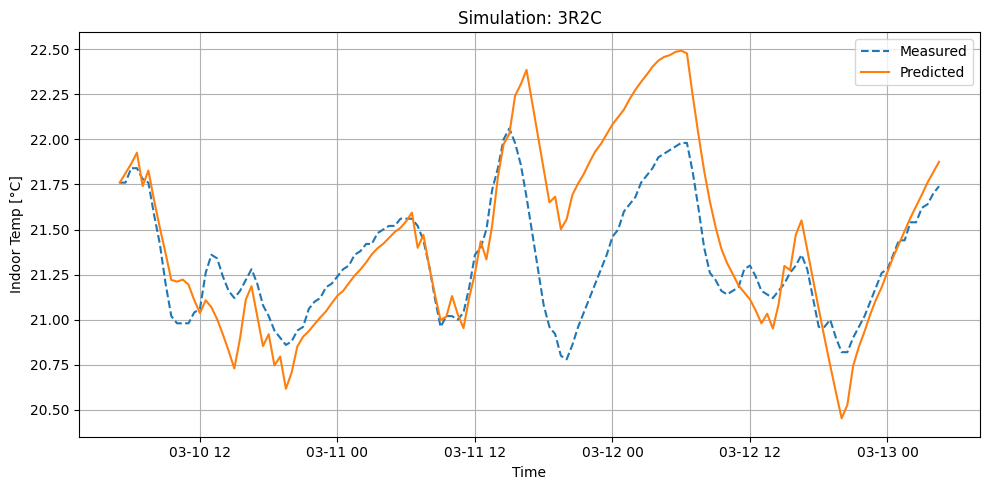


=== Best result ===
Best Trial Validation #: 10
Best Trial Training #: 26
Best RMSE Validation: 1.5182
RMSE Training of Best Validation : 0.2655
Best RMSE Training: 0.2655
Best initialization Validation: {'R_in_e': 0.5496774380414143, 'R_e_a': 0.7148813267773623, 'R_in_a': 0.6605371793410135, 'C_in': 140687014.5760255, 'C_e': 477477775.05093384, 'Ain': 464.8750837286425, 'Ae': 349.2430976467772, 'fh': 0.6117207462343522}
Best initialization Training: {'R_in_e': 0.3768833259453849, 'R_e_a': 0.08441721598197009, 'R_in_a': 0.7773697690115093, 'C_in': 279643720.61816674, 'C_e': 212686782.61424115, 'Ain': 571.0032719742452, 'Ae': 70.05450273312712, 'fh': 0.49262510429085915}
Best parameters Validation: {'R_in_e': 0.015296267640094776, 'R_e_a': 0.9998721891842064, 'R_in_a': 0.0014739100895213128, 'C_in': 499999911.92242736, 'C_e': 499999966.68162936, 'Ain': 136.11504880564357, 'Ae': 0.0002145990881885873, 'fh': 0.3170305488553417, 'Objective': 0.2655056540440627, 'Solve_time': 0.16803097724

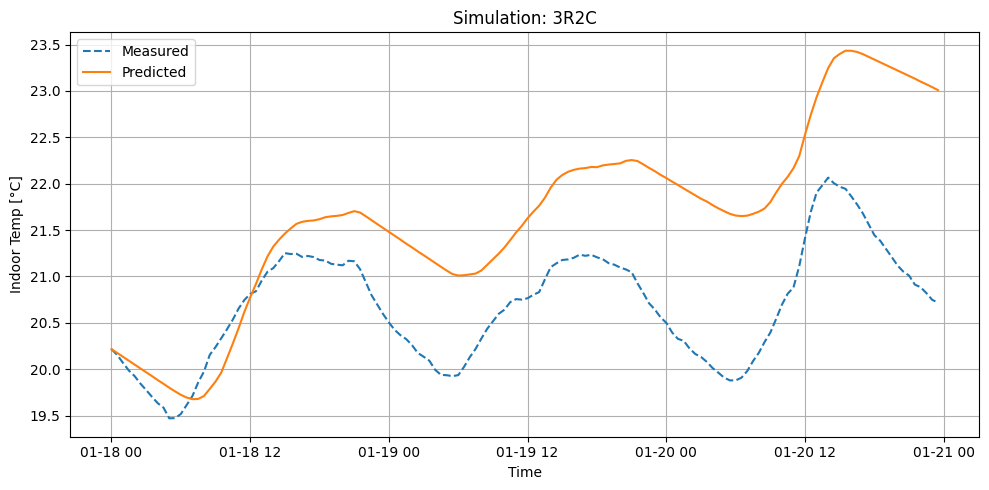


=== Best result ===
Best Trial Validation #: 21
Best Trial Training #: 8
Best RMSE Validation: 0.8589
RMSE Training of Best Validation : 0.4232
Best RMSE Training: 0.3853
Best initialization Validation: {'R_in_e': 0.789382067368731, 'R_e_a': 0.4989437567301282, 'R_in_a': 0.08783336779933627, 'C_in': 269016164.36745536, 'C_e': 293833717.8924187, 'Ain': 12.747040464604623, 'Ae': 7.381435074572893, 'fh': 0.12758030279556376}
Best initialization Training: {'R_in_e': 0.6185101122174379, 'R_e_a': 0.35880455531480765, 'R_in_a': 0.1144440346074294, 'C_in': 336115024.600807, 'C_e': 260633542.75099286, 'Ain': 13.206667266840258, 'Ae': 8.894843852664975, 'fh': 0.8521815003185401}
Best parameters Validation: {'R_in_e': 0.002539063563312051, 'R_e_a': 0.0029224376837422186, 'R_in_a': 0.015238173548636255, 'C_in': 2533858.268862751, 'C_e': 480669779.5423762, 'Ain': 1.8457000880874053, 'Ae': 17.099984358946887, 'fh': 0.9037539354191716, 'Objective': 0.4231952845743519, 'Solve_time': 0.441071987152099

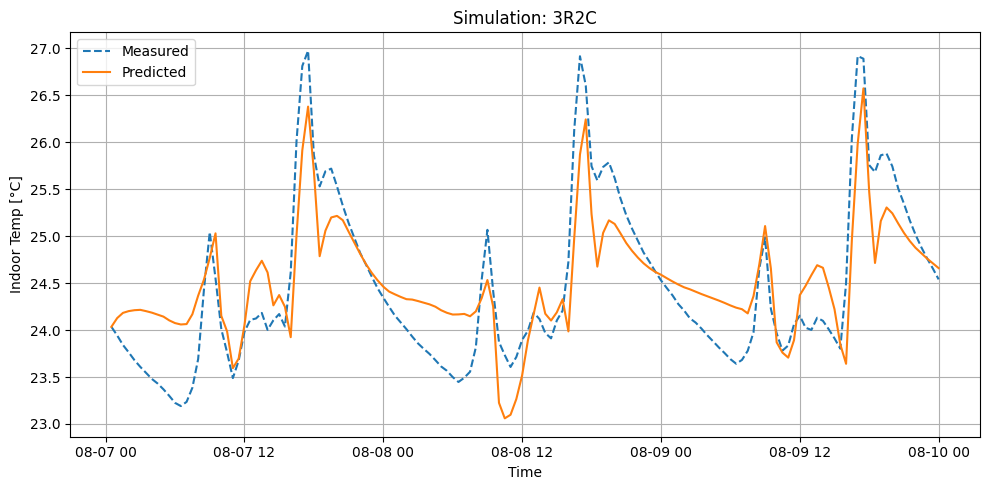


=== Best result ===
Best Trial Validation #: 25
Best Trial Training #: 10
Best RMSE Validation: 0.4925
RMSE Training of Best Validation : 0.2899
Best RMSE Training: 0.2221
Best initialization Validation: {'R_in_e': 0.8685995079220149, 'R_e_a': 0.48794376705126413, 'R_in_a': 0.8946576746671974, 'C_in': 400127772.7177103, 'C_e': 213181538.73014748, 'Ain': 0.38432292534317547, 'Ae': 4.594455977746639, 'fh': 0.5416342146608669}
Best initialization Training: {'R_in_e': 0.7075313956790852, 'R_e_a': 0.15338650387134709, 'R_in_a': 0.5767120718066464, 'C_in': 303750808.1450451, 'C_e': 212641204.9798906, 'Ain': 12.593222784759197, 'Ae': 15.977682515848675, 'fh': 0.9255685129067763}
Best parameters Validation: {'R_in_e': 0.0015712152407952066, 'R_e_a': 0.999986709869713, 'R_in_a': 0.010790412329340847, 'C_in': 16551782.970508073, 'C_e': 96079751.74056879, 'Ain': 3.2732869028643656, 'Ae': 2.2594851479960116, 'fh': 1.0000000008882322, 'Objective': 0.28990422177675657, 'Solve_time': 0.2292180061340

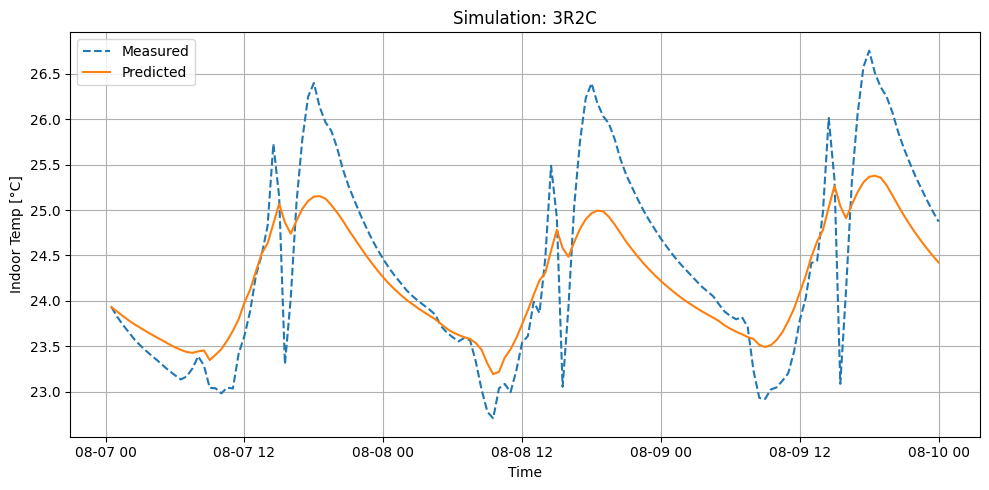

In [ ]:
# --- Bounds ---
bounds_cs1 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs1_surface_area),
    "Ae": (0.0001, 0.3 * cs1_surface_area),
    "fh": (0,1)
}
bounds_cs2 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}
bounds_cs3 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs3_surface_area),
    "Ae": (0.0001, 0.3 * cs3_surface_area),
    "fh": (0,1)
}
bounds_cs4 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs4_surface_area),
    "Ae": (0.0001, 0.3 * cs4_surface_area),
    "fh": (0,1)
}

###################### ======================== Case Study 1 ======================= ###########################

model_3r2c_cs1, parameters_3r2c_cs1, best_initialization_3r2c_cs1, validation_pred_3r2c_cs1, initialize_testing_3r2c_cs1, all_trials_3r2c_cs1 = train_greybox_model_with_validation_process(
    train_df=train_cs1, val_df=val_cs1, model_type="3R2C", bounds=bounds_cs1, 
    num_trials=30, deltaT=1800, show_plot=False, log=False)

initialize_testing_3r2c_cs1['Tin'] = test_cs1['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
testing_performance_3r2c_cs1, testing_df_3r2c_cs1 = simulate_and_evaluate(
        val_df=test_cs1, param_dict=parameters_3r2c_cs1, model_type="3R2C",
        initializations=initialize_testing_3r2c_cs1, show_plot=True
    )

###################### ======================== Case Study 2 ======================= ###########################

model_3r2c_cs2, parameters_3r2c_cs2, best_initialization_3r2c_cs2, validation_pred_3r2c_cs2, initialize_testing_3r2c_cs2, all_trials_3r2c_cs2 = train_greybox_model_with_validation_process(
    train_df=train_cs2, val_df=val_cs2, model_type="3R2C", bounds=bounds_cs2, 
    num_trials=30, deltaT=1800, show_plot=False, log=False)

initialize_testing_3r2c_cs2['Tin'] = test_cs2['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
testing_performance_3r2c_cs2, testing_df_3r2c_cs2= simulate_and_evaluate(
        val_df=test_cs2, param_dict=parameters_3r2c_cs2, model_type="3R2C",
        initializations=initialize_testing_3r2c_cs2, show_plot=True
    )

###################### ======================== Case Study 3 ======================= ###########################

model_3r2c_cs3, parameters_3r2c_cs3, best_initialization_3r2c_cs3, validation_pred_3r2c_cs3, initialize_testing_3r2c_cs3, all_trials_3r2c_cs3 = train_greybox_model_with_validation_process(
    train_df=train_cs3, val_df=val_cs3, model_type="3R2C", bounds=bounds_cs3, 
    num_trials=30, deltaT=1800, show_plot=False, log=False)

initialize_testing_3r2c_cs3['Tin'] = test_cs3['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
testing_performance_3r2c_cs2, testing_df_3r2c_cs3= simulate_and_evaluate(
        val_df=test_cs3, param_dict=parameters_3r2c_cs3, model_type="3R2C",
        initializations=initialize_testing_3r2c_cs3, show_plot=True
    )

###################### ======================== Case Study 4 ======================= ###########################

model_3r2c_cs4, parameters_3r2c_cs4, best_initialization_3r2c_cs4, validation_pred_3r2c_cs4, initialize_testing_3r2c_cs4, all_trials_3r2c_cs4 = train_greybox_model_with_validation_process(
    train_df=train_cs4, val_df=val_cs4, model_type="3R2C", bounds=bounds_cs4, 
    num_trials=30, deltaT=1800, show_plot=False, log=False)

initialize_testing_3r2c_cs4['Tin'] = test_cs4['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
testing_performance_3r2c_cs4, testing_df_3r2c_cs4 = simulate_and_evaluate(
        val_df=test_cs4, param_dict=parameters_3r2c_cs4, model_type="3R2C",
        initializations=initialize_testing_3r2c_cs4, show_plot=True
    )


=== Best result ===
Best Trial Validation #: 12
Best Trial Training #: 5
Best RMSE Validation: 0.1771
RMSE Training of Best Validation : 0.0110
Best RMSE Training: 0.0078
Best initialization Validation: {'R_int_in': 0.2761820624684805, 'R_in_e': 0.3957869234464511, 'R_e_a': 0.4229845221817537, 'R_in_a': 0.41219903311501466, 'C_int': 453916368.0752096, 'C_in': 357359483.060068, 'C_e': 304423120.788443, 'Aint': 9.281250598611676, 'Ain': 24.713729147600418, 'Ae': 28.65181983849852, 'fh_int': 0.8211982825502265, 'fh_in': 0.0015651051914729042, 'fh_e': 0.636401370183407}
Best initialization Training: {'R_int_in': 0.46983042953357684, 'R_in_e': 0.3026627302384804, 'R_e_a': 0.5991607693291633, 'R_in_a': 0.29864333209319993, 'C_int': 150799652.81968397, 'C_in': 371904767.5273238, 'C_e': 25213646.5860027, 'Aint': 27.0868595662601, 'Ain': 25.567931005348004, 'Ae': 20.034173716323874, 'fh_int': 0.5932215701073843, 'fh_in': 0.8923024981396522, 'fh_e': 0.18533017952871444}
Best parameters Validati

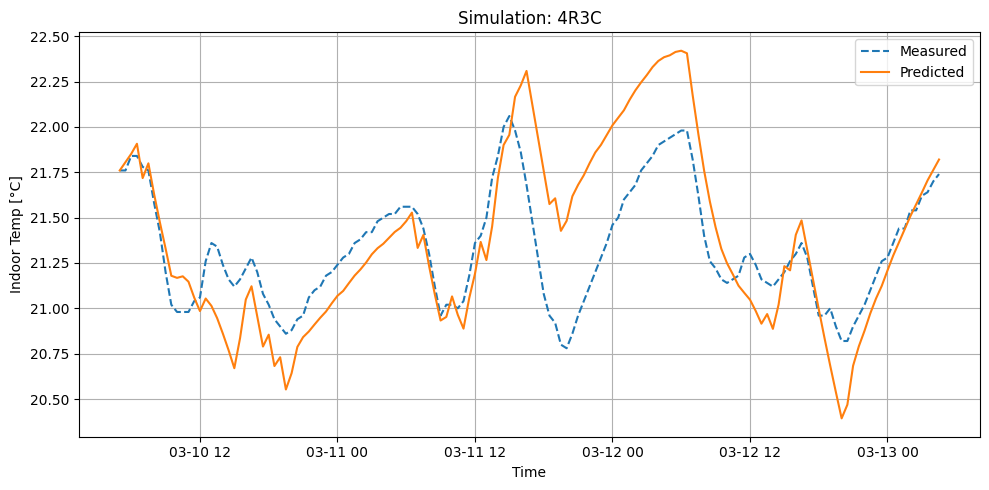


=== Best result ===
Best Trial Validation #: 19
Best Trial Training #: 4
Best RMSE Validation: 0.4808
RMSE Training of Best Validation : 0.1934
Best RMSE Training: 0.0719
Best initialization Validation: {'R_int_in': 0.6230985780880116, 'R_in_e': 0.98121548108877, 'R_e_a': 0.1917274344841602, 'R_in_a': 0.7930099260558066, 'C_int': 454059918.33727413, 'C_in': 471918354.4987261, 'C_e': 480115639.4774371, 'Aint': 328.51962024856346, 'Ain': 615.7039843038565, 'Ae': 477.10545476367577, 'fh_int': 0.1616714362369619, 'fh_in': 0.47690010646797, 'fh_e': 0.718331175372004}
Best initialization Training: {'R_int_in': 0.7491479436579476, 'R_in_e': 0.31895162167059443, 'R_e_a': 0.0021344236184763494, 'R_in_a': 0.5121068809587553, 'C_int': 24569731.97356844, 'C_in': 138953375.44106466, 'C_e': 353839871.9429112, 'Aint': 39.494555352813336, 'Ain': 528.7832662504322, 'Ae': 2.4066508929150925, 'fh_int': 0.24682386920190225, 'fh_in': 0.7409040561520714, 'fh_e': 0.3162701497293068}
Best parameters Validati

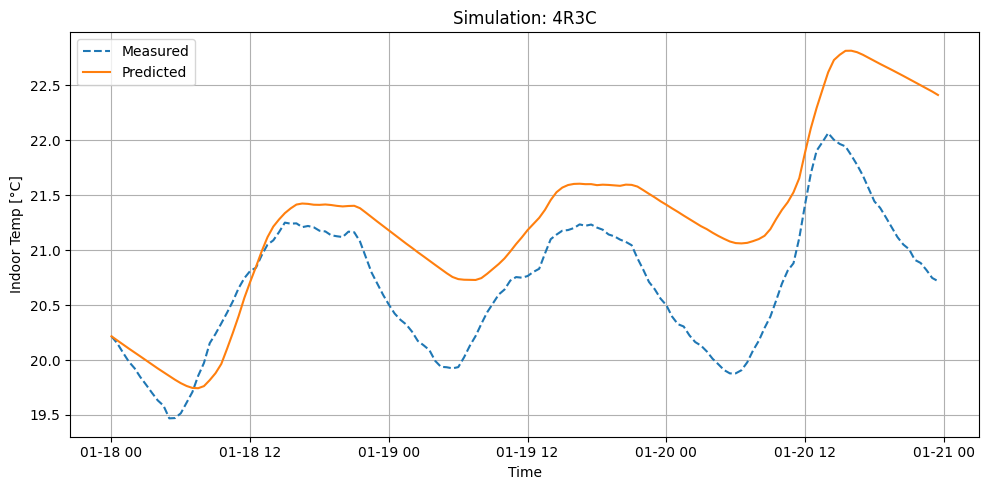


=== Best result ===
Best Trial Validation #: 2
Best Trial Training #: 10
Best RMSE Validation: 0.7639
RMSE Training of Best Validation : 0.3884
Best RMSE Training: 0.3415
Best initialization Validation: {'R_int_in': 0.7276026480921594, 'R_in_e': 0.5629486488137659, 'R_e_a': 0.947196485774302, 'R_in_a': 0.4972662353765968, 'C_int': 191002233.68310338, 'C_in': 82522026.06147759, 'C_e': 393359379.34781575, 'Aint': 12.559017794099404, 'Ain': 6.5725327232588535, 'Ae': 0.4309048593614261, 'fh_int': 0.8389973277180107, 'fh_in': 0.011417983454073632, 'fh_e': 0.703699779629051}
Best initialization Training: {'R_int_in': 0.7072166101389522, 'R_in_e': 0.6107874022453267, 'R_e_a': 0.31428157942522095, 'R_in_a': 0.27255406125653764, 'C_int': 299316939.4121083, 'C_in': 433208502.0455117, 'C_e': 473430783.98698974, 'Aint': 1.8110786647238148, 'Ain': 2.6476537925597494, 'Ae': 16.15499555156478, 'fh_int': 0.7365352283347926, 'fh_in': 0.8829938248297731, 'fh_e': 0.20263263413534316}
Best parameters Val

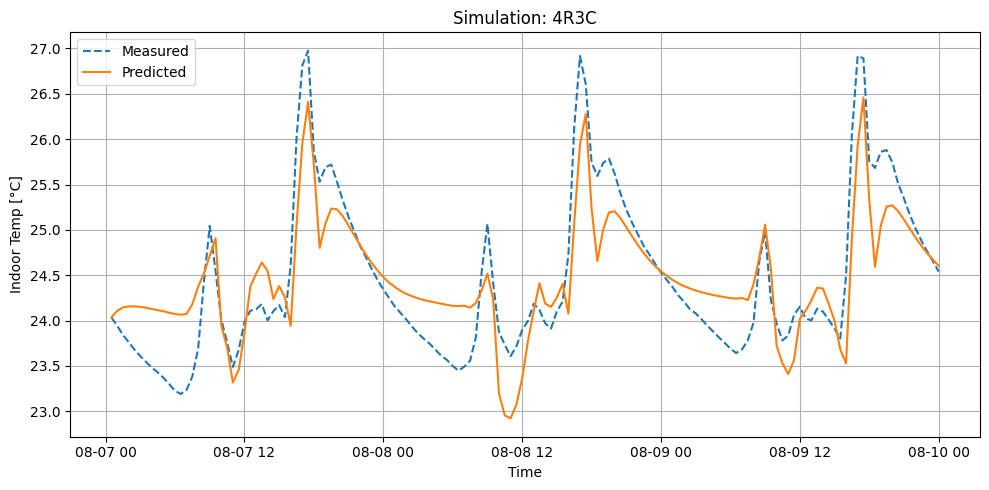


=== Best result ===
Best Trial Validation #: 24
Best Trial Training #: 21
Best RMSE Validation: 0.5319
RMSE Training of Best Validation : 0.2275
Best RMSE Training: 0.1947
Best initialization Validation: {'R_int_in': 0.46913291612582153, 'R_in_e': 0.46736681411393916, 'R_e_a': 0.7610544911703717, 'R_in_a': 0.15618321959691595, 'C_int': 244247958.62510532, 'C_in': 215676624.80358458, 'C_e': 298939052.4446721, 'Aint': 17.092436769812174, 'Ain': 13.157599143913595, 'Ae': 6.803563735027702, 'fh_int': 0.827553052274047, 'fh_in': 0.17070836331248018, 'fh_e': 0.030463686308960125}
Best initialization Training: {'R_int_in': 0.2800857769888063, 'R_in_e': 0.22027238072293606, 'R_e_a': 0.18447210430907948, 'R_in_a': 0.8260595296575457, 'C_int': 143710934.7492521, 'C_in': 463649342.3939873, 'C_e': 484999350.8421812, 'Aint': 9.768596909877369, 'Ain': 2.4454048974716547, 'Ae': 6.4048375069665004, 'fh_int': 0.797732263348214, 'fh_in': 0.36739072869707046, 'fh_e': 0.08701721830278875}
Best parameters

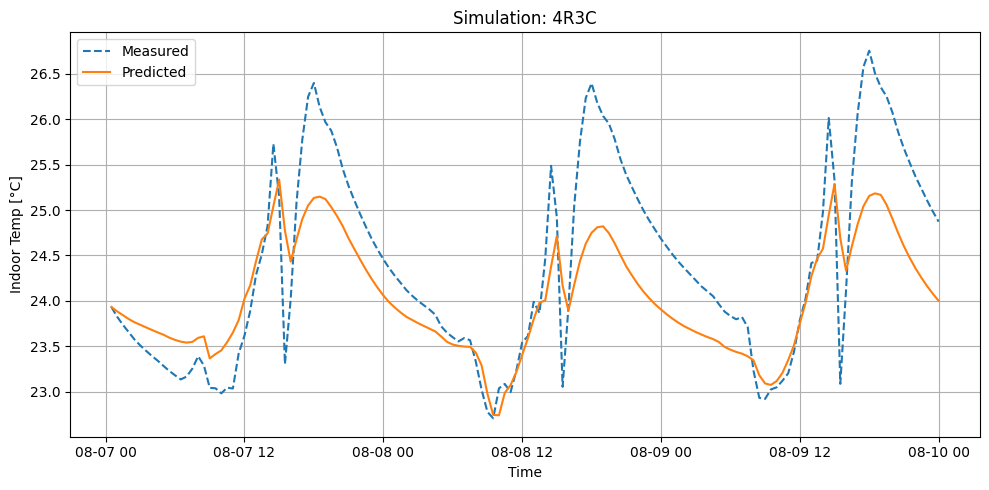

In [5]:
# --- Bounds ---
bounds_cs1 = {
    "R_int_in": (0.002, 1),
    "R_in_e": (0.002, 1),
    "R_e_a": (0.002, 1),
    "R_in_a": (0.002, 1),
    "C_int": (1.2e6, 5e8),
    "C_in": (1.2e6, 5e8),
    "C_e": (1.2e6, 5e8),
    "Aint": (0.0001, 0.3 * cs1_surface_area),
    "Ain": (0.0001, 0.3 * cs1_surface_area),
    "Ae": (0.0001, 0.3 * cs1_surface_area),
    "fh_int": (0,1),
    "fh_in": (0,1),
    "fh_e": (0,1)
}
bounds_cs2 = {
    "R_int_in": (0.002, 1),
    "R_in_e": (0.002, 1),
    "R_e_a": (0.002, 1),
    "R_in_a": (0.002, 1),
    "C_int": (1.2e6, 5e8),
    "C_in": (1.2e6, 5e8),
    "C_e": (1.2e6, 5e8),
    "Aint": (0.0001, 0.3 * cs2_surface_area),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh_int": (0,1),
    "fh_in": (0,1),
    "fh_e": (0,1)
}
bounds_cs3 = {
   "R_int_in": (0.002, 1),
    "R_in_e": (0.002, 1),
    "R_e_a": (0.002, 1),
    "R_in_a": (0.002, 1),
    "C_int": (1.2e6, 5e8),
    "C_in": (1.2e6, 5e8),
    "C_e": (1.2e6, 5e8),
    "Aint": (0.0001, 0.3 * cs3_surface_area),
    "Ain": (0.0001, 0.3 * cs3_surface_area),
    "Ae": (0.0001, 0.3 * cs3_surface_area),
    "fh_int": (0,1),
    "fh_in": (0,1),
    "fh_e": (0,1)
}
bounds_cs4 = {
    "R_int_in": (0.002, 1),
    "R_in_e": (0.002, 1),
    "R_e_a": (0.002, 1),
    "R_in_a": (0.002, 1),
    "C_int": (1.2e6, 5e8),
    "C_in": (1.2e6, 5e8),
    "C_e": (1.2e6, 5e8),
    "Aint": (0.0001, 0.3 * cs4_surface_area),
    "Ain": (0.0001, 0.3 * cs4_surface_area),
    "Ae": (0.0001, 0.3 * cs4_surface_area),
    "fh_int": (0,1),
    "fh_in": (0,1),
    "fh_e": (0,1)
}

###################### ======================== Case Study 1 ======================= ###########################

model_4r3c_cs1, parameters_4r3c_cs1, best_initialization_4r3c_cs1, validation_pred_4r3c_cs1, initialize_testing_4r3c_cs1, all_trials_4r3c_cs1 = train_greybox_model_with_validation_process(
    train_df=train_cs1, val_df=val_cs1, model_type="4R3C", bounds=bounds_cs1, 
    num_trials=30, deltaT=1800, show_plot=False, log=False)

initialize_testing_4r3c_cs1['Tin'] = test_cs1['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
testing_performance_4r3c_cs1, testing_df_4r3c_cs1 = simulate_and_evaluate(
        val_df=test_cs1, param_dict=parameters_4r3c_cs1, model_type="4R3C",
        initializations=initialize_testing_4r3c_cs1, show_plot=True
    )

###################### ======================== Case Study 2 ======================= ###########################

model_4r3c_cs2, parameters_4r3c_cs2, best_initialization_4r3c_cs2, validation_pred_4r3c_cs2, initialize_testing_4r3c_cs2, all_trials_4r3c_cs2 = train_greybox_model_with_validation_process(
    train_df=train_cs2, val_df=val_cs2, model_type="4R3C", bounds=bounds_cs2, 
    num_trials=30, deltaT=1800, show_plot=False, log=False)

initialize_testing_4r3c_cs2['Tin'] = test_cs2['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
testing_performance_4r3c_cs2, testing_df_4r3c_cs2 = simulate_and_evaluate(
        val_df=test_cs2, param_dict=parameters_4r3c_cs2, model_type="4R3C",
        initializations=initialize_testing_4r3c_cs2, show_plot=True
    )

###################### ======================== Case Study 3 ======================= ###########################

model_4r3c_cs3, parameters_4r3c_cs3, best_initialization_4r3c_cs3, validation_pred_4r3c_cs3, initialize_testing_4r3c_cs3, all_trials_4r3c_cs3 = train_greybox_model_with_validation_process(
    train_df=train_cs3, val_df=val_cs3, model_type="4R3C", bounds=bounds_cs3, 
    num_trials=30, deltaT=1800, show_plot=False, log=False)

initialize_testing_4r3c_cs3['Tin'] = test_cs3['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
testing_performance_4r3c_cs3, testing_df_4r3c_cs3 = simulate_and_evaluate(
        val_df=test_cs3, param_dict=parameters_4r3c_cs3, model_type="4R3C",
        initializations=initialize_testing_4r3c_cs3, show_plot=True
    )

###################### ======================== Case Study 4 ======================= ###########################

model_4r3c_cs4, parameters_4r3c_cs4, best_initialization_4r3c_cs4, validation_pred_4r3c_cs4, initialize_testing_4r3c_cs4, all_trials_4r3c_cs4 = train_greybox_model_with_validation_process(
    train_df=train_cs4, val_df=val_cs4, model_type="4R3C", bounds=bounds_cs4, 
    num_trials=30, deltaT=1800, show_plot=False, log=False)

initialize_testing_4r3c_cs4['Tin'] = test_cs4['INDOOR_TEMP'].iloc[0]

# --- Run Simulation for Testing ---
testing_performance_4r3c_cs4, testing_df_4r3c_cs4 = simulate_and_evaluate(
        val_df=test_cs4, param_dict=parameters_4r3c_cs4, model_type="4R3C",
        initializations=initialize_testing_4r3c_cs4, show_plot=True
    )


RMSE 1R1C Case Study 1: 0.15 °C
RMSE 2R2C Case Study 1: 0.14 °C
RMSE 3R2C Case Study 1: 0.10 °C
RMSE 4R3C Case Study 1: 0.10 °C
RMSE 1R1C Case Study 2: 0.87 °C
RMSE 2R2C Case Study 2: 0.93 °C
RMSE 3R2C Case Study 2: 0.51 °C
RMSE 4R3C Case Study 2: 0.44 °C
RMSE 1R1C Case Study 3: 1.16 °C
RMSE 2R2C Case Study 3: 1.12 °C
RMSE 3R2C Case Study 3: 0.65 °C
RMSE 4R3C Case Study 3: 0.62 °C
RMSE 1R1C Case Study 4: 0.93 °C
RMSE 2R2C Case Study 4: 0.51 °C
RMSE 3R2C Case Study 4: 0.48 °C
RMSE 4R3C Case Study 4: 0.48 °C


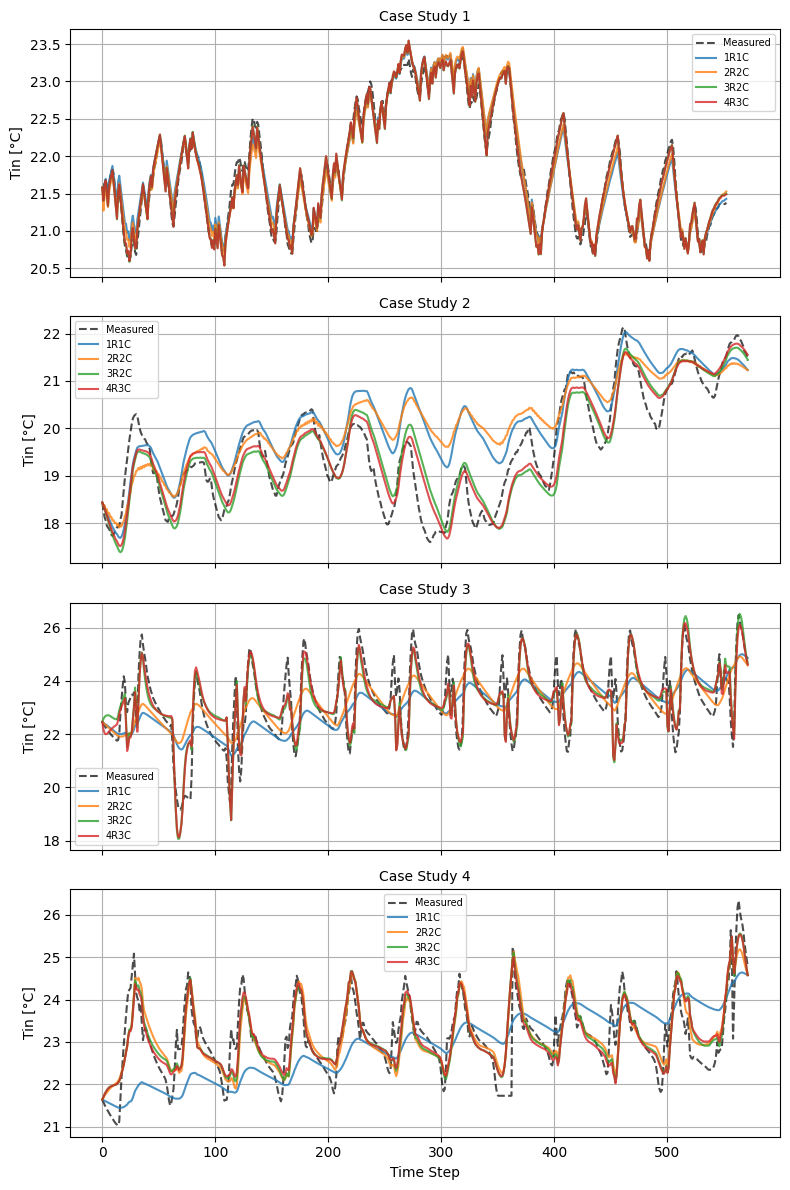

In [6]:
T_model_1r1c_cs1 = np.array([model_1r1c_cs1.T_in[t]() for t in model_1r1c_cs1.T_in.index_set()])
T_model_2r2c_cs1 = np.array([model_2r2c_cs1.T_in[t]() for t in model_2r2c_cs1.T_in.index_set()])
T_model_3r2c_cs1 = np.array([model_3r2c_cs1.T_in[t]() for t in model_3r2c_cs1.T_in.index_set()])
T_model_4r3c_cs1 = np.array([model_4r3c_cs1.T_in[t]() for t in model_4r3c_cs1.T_in.index_set()])

T_model_1r1c_cs2 = np.array([model_1r1c_cs2.T_in[t]() for t in model_1r1c_cs2.T_in.index_set()])
T_model_2r2c_cs2 = np.array([model_2r2c_cs2.T_in[t]() for t in model_2r2c_cs2.T_in.index_set()])
T_model_3r2c_cs2 = np.array([model_3r2c_cs2.T_in[t]() for t in model_3r2c_cs2.T_in.index_set()])
T_model_4r3c_cs2 = np.array([model_4r3c_cs2.T_in[t]() for t in model_4r3c_cs2.T_in.index_set()])

T_model_1r1c_cs3 = np.array([model_1r1c_cs3.T_in[t]() for t in model_1r1c_cs3.T_in.index_set()])
T_model_2r2c_cs3 = np.array([model_2r2c_cs3.T_in[t]() for t in model_2r2c_cs3.T_in.index_set()])
T_model_3r2c_cs3 = np.array([model_3r2c_cs3.T_in[t]() for t in model_3r2c_cs3.T_in.index_set()])
T_model_4r3c_cs3 = np.array([model_4r3c_cs3.T_in[t]() for t in model_4r3c_cs3.T_in.index_set()])

T_model_1r1c_cs4 = np.array([model_1r1c_cs4.T_in[t]() for t in model_1r1c_cs4.T_in.index_set()])
T_model_2r2c_cs4 = np.array([model_2r2c_cs4.T_in[t]() for t in model_2r2c_cs4.T_in.index_set()])
T_model_3r2c_cs4 = np.array([model_3r2c_cs4.T_in[t]() for t in model_3r2c_cs4.T_in.index_set()])
T_model_4r3c_cs4 = np.array([model_4r3c_cs4.T_in[t]() for t in model_4r3c_cs4.T_in.index_set()])


datasets=[train_cs1, train_cs2, train_cs3, train_cs4]
validation_dataset=[[T_model_1r1c_cs1,T_model_2r2c_cs1,T_model_3r2c_cs1, T_model_4r3c_cs1] ,
                    [T_model_1r1c_cs2,T_model_2r2c_cs2,T_model_3r2c_cs2, T_model_4r3c_cs2] , 
                    [T_model_1r1c_cs3,T_model_2r2c_cs3,T_model_3r2c_cs3, T_model_4r3c_cs3] , 
                    [T_model_1r1c_cs4,T_model_2r2c_cs4,T_model_3r2c_cs4, T_model_4r3c_cs4]]
labels = ['1R1C', '2R2C', '3R2C', '4R3C']
TC_labels = ['Case Study 1', 'Case Study 2', 'Case Study 3', 'Case Study 4']
plot_model_validation(datasets,validation_dataset,labels,TC_labels, figsize=(8,12))

RMSE 1R1C Case Study 1: 0.28 °C
RMSE 2R2C Case Study 1: 0.22 °C
RMSE 3R2C Case Study 1: 0.18 °C
RMSE 4R3C Case Study 1: 0.18 °C
RMSE 1R1C Case Study 2: 1.34 °C
RMSE 2R2C Case Study 2: 1.42 °C
RMSE 3R2C Case Study 2: 0.86 °C
RMSE 4R3C Case Study 2: 0.48 °C
RMSE 1R1C Case Study 3: 1.06 °C
RMSE 2R2C Case Study 3: 0.97 °C
RMSE 3R2C Case Study 3: 0.86 °C
RMSE 4R3C Case Study 3: 0.76 °C
RMSE 1R1C Case Study 4: 1.35 °C
RMSE 2R2C Case Study 4: 0.60 °C
RMSE 3R2C Case Study 4: 0.52 °C
RMSE 4R3C Case Study 4: 0.53 °C


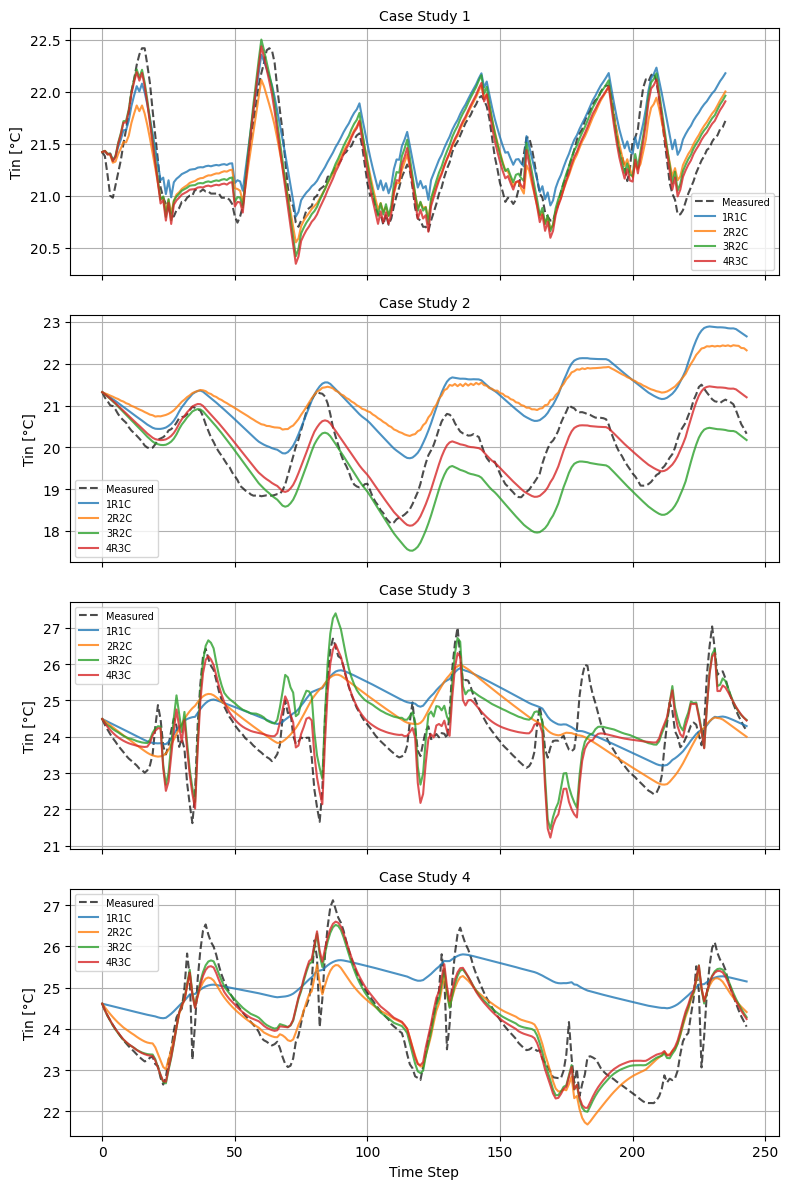

In [7]:
T_model_1r1c_cs1 = np.array(validation_pred_1r1c_cs1['T_in_estimate'])
T_model_2r2c_cs1 = np.array(validation_pred_2r2c_cs1['T_in_estimate'])
T_model_3r2c_cs1 = np.array(validation_pred_3r2c_cs1['T_in_estimate'])
T_model_4r3c_cs1 = np.array(validation_pred_4r3c_cs1['T_in_estimate'])

T_model_1r1c_cs2 = np.array(validation_pred_1r1c_cs2['T_in_estimate'])
T_model_2r2c_cs2 = np.array(validation_pred_2r2c_cs2['T_in_estimate'])
T_model_3r2c_cs2 = np.array(validation_pred_3r2c_cs2['T_in_estimate'])
T_model_4r3c_cs2 = np.array(validation_pred_4r3c_cs2['T_in_estimate'])

T_model_1r1c_cs3 = np.array(validation_pred_1r1c_cs3['T_in_estimate'])
T_model_2r2c_cs3 = np.array(validation_pred_2r2c_cs3['T_in_estimate'])
T_model_3r2c_cs3 = np.array(validation_pred_3r2c_cs3['T_in_estimate'])
T_model_4r3c_cs3 = np.array(validation_pred_4r3c_cs3['T_in_estimate'])

T_model_1r1c_cs4 = np.array(validation_pred_1r1c_cs4['T_in_estimate'])
T_model_2r2c_cs4 = np.array(validation_pred_2r2c_cs4['T_in_estimate'])
T_model_3r2c_cs4 = np.array(validation_pred_3r2c_cs4['T_in_estimate'])
T_model_4r3c_cs4 = np.array(validation_pred_4r3c_cs4['T_in_estimate'])
datasets=[val_cs1, val_cs2, val_cs3, val_cs4]
validation_dataset=[[T_model_1r1c_cs1,T_model_2r2c_cs1,T_model_3r2c_cs1, T_model_4r3c_cs1] ,
                    [T_model_1r1c_cs2,T_model_2r2c_cs2,T_model_3r2c_cs2, T_model_4r3c_cs2] , 
                    [T_model_1r1c_cs3,T_model_2r2c_cs3,T_model_3r2c_cs3, T_model_4r3c_cs3] , 
                    [T_model_1r1c_cs4,T_model_2r2c_cs4,T_model_3r2c_cs4, T_model_4r3c_cs4]]
labels = ['1R1C', '2R2C', '3R2C', '4R3C']
TC_labels = ['Case Study 1', 'Case Study 2', 'Case Study 3', 'Case Study 4']
plot_model_validation(datasets,validation_dataset,labels, TC_labels, figsize=(8,12))

RMSE 1R1C Case Study 1: 0.36 °C
RMSE 2R2C Case Study 1: 0.32 °C
RMSE 3R2C Case Study 1: 0.33 °C
RMSE 4R3C Case Study 1: 0.31 °C
RMSE 1R1C Case Study 2: 0.34 °C
RMSE 2R2C Case Study 2: 0.37 °C
RMSE 3R2C Case Study 2: 0.36 °C
RMSE 4R3C Case Study 2: 0.74 °C
RMSE 1R1C Case Study 3: 0.67 °C
RMSE 2R2C Case Study 3: 0.58 °C
RMSE 3R2C Case Study 3: 0.49 °C
RMSE 4R3C Case Study 3: 0.48 °C
RMSE 1R1C Case Study 4: 0.85 °C
RMSE 2R2C Case Study 4: 0.64 °C
RMSE 3R2C Case Study 4: 0.56 °C
RMSE 4R3C Case Study 4: 0.69 °C


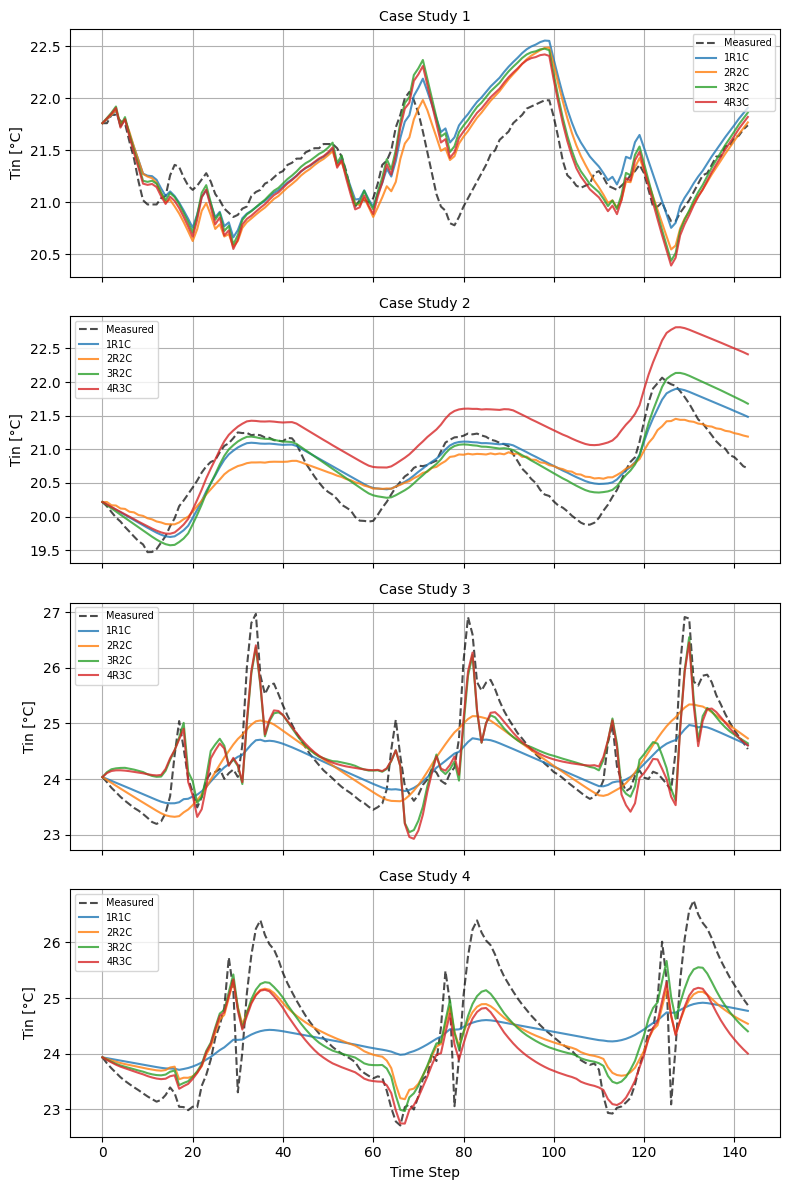

In [8]:
T_model_1r1c_cs1 = np.array(testing_df_1r1c_cs1['T_in_estimate'])
T_model_2r2c_cs1 = np.array(testing_df_2r2c_cs1['T_in_estimate'])
T_model_3r2c_cs1 = np.array(testing_df_3r2c_cs1['T_in_estimate'])
T_model_4r3c_cs1 = np.array(testing_df_4r3c_cs1['T_in_estimate'])

T_model_1r1c_cs2 = np.array(testing_df_1r1c_cs2['T_in_estimate'])
T_model_2r2c_cs2 = np.array(testing_df_2r2c_cs2['T_in_estimate'])
T_model_3r2c_cs2 = np.array(testing_df_3r2c_cs2['T_in_estimate'])
T_model_4r3c_cs2 = np.array(testing_df_4r3c_cs2['T_in_estimate'])

T_model_1r1c_cs3 = np.array(testing_df_1r1c_cs3['T_in_estimate'])
T_model_2r2c_cs3 = np.array(testing_df_2r2c_cs3['T_in_estimate'])
T_model_3r2c_cs3 = np.array(testing_df_3r2c_cs3['T_in_estimate'])
T_model_4r3c_cs3 = np.array(testing_df_4r3c_cs3['T_in_estimate'])

T_model_1r1c_cs4 = np.array(testing_df_1r1c_cs4['T_in_estimate'])
T_model_2r2c_cs4 = np.array(testing_df_2r2c_cs4['T_in_estimate'])
T_model_3r2c_cs4 = np.array(testing_df_3r2c_cs4['T_in_estimate'])
T_model_4r3c_cs4 = np.array(testing_df_4r3c_cs4['T_in_estimate'])
datasets=[test_cs1,test_cs2,test_cs3, test_cs4]
validation_dataset=[[T_model_1r1c_cs1,T_model_2r2c_cs1,T_model_3r2c_cs1, T_model_4r3c_cs1] ,
                    [T_model_1r1c_cs2,T_model_2r2c_cs2,T_model_3r2c_cs2, T_model_4r3c_cs2] , 
                    [T_model_1r1c_cs3,T_model_2r2c_cs3,T_model_3r2c_cs3, T_model_4r3c_cs3] , 
                    [T_model_1r1c_cs4,T_model_2r2c_cs4,T_model_3r2c_cs4, T_model_4r3c_cs4]]
labels = ['1R1C', '2R2C', '3R2C', '4R3C']
TC_labels = ['Case Study 1', 'Case Study 2', 'Case Study 3', 'Case Study 4']

plot_model_validation(datasets,validation_dataset,labels, TC_labels, figsize=(8,12))

## Computantional Time ##

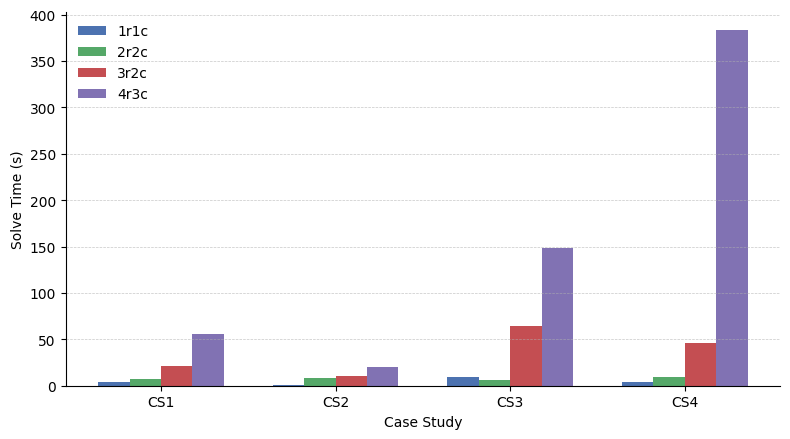

In [9]:
cases = ['CS1','CS2', 'CS3', 'CS4']
models = ['1r1c', '2r2c', '3r2c', '4r3c']
solve_times = {
    '1r1c': [
        all_trials_1r1c_cs1['Solve_time'].sum(),
        all_trials_1r1c_cs2['Solve_time'].sum(),
        all_trials_1r1c_cs3['Solve_time'].sum(),
        all_trials_1r1c_cs4['Solve_time'].sum()
    ],
    '2r2c': [
        all_trials_2r2c_cs1['Solve_time'].sum(),
        all_trials_2r2c_cs2['Solve_time'].sum(),
        all_trials_2r2c_cs3['Solve_time'].sum(),
        all_trials_2r2c_cs4['Solve_time'].sum()
    ],
    '3r2c': [
        all_trials_3r2c_cs1['Solve_time'].sum(),
        all_trials_3r2c_cs2['Solve_time'].sum(),
        all_trials_3r2c_cs3['Solve_time'].sum(),
        all_trials_3r2c_cs4['Solve_time'].sum()
    ],
    '4r3c': [
        all_trials_4r3c_cs1['Solve_time'].sum(),
        all_trials_4r3c_cs2['Solve_time'].sum(),
        all_trials_4r3c_cs3['Solve_time'].sum(),
        all_trials_4r3c_cs4['Solve_time'].sum()
    ],
}

x = np.arange(len(cases))
width = 0.18
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b3']

fig, ax = plt.subplots(figsize=(8, 4.5))

for i, model in enumerate(models):
    ax.bar(x + i * width, solve_times[model], width, label=model, color=colors[i])

ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(cases)
ax.set_ylabel("Solve Time (s)")
ax.set_xlabel("Case Study")
ax.legend(frameon=False)
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, axis='y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

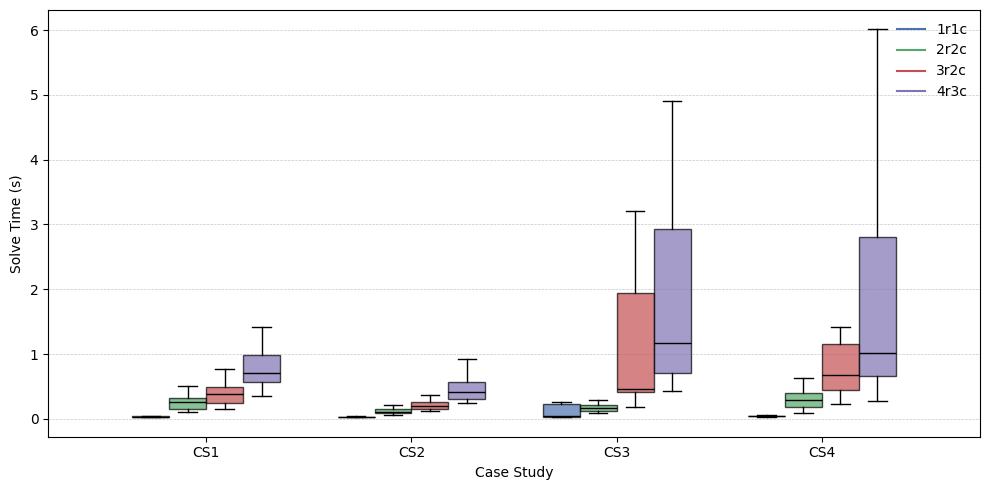

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))

positions = []
data = []
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b3']
width = 0.18

# Prepare data and positions
for i, case in enumerate(cases):
    for j, model in enumerate(models):
        positions.append(i + j * width)
        # Use all_trials_XrXc_csY['Solve_time'] for each box
        if model == '1r1c':
            data.append(all_trials_1r1c_cs1['Solve_time'].values if i == 0 else
                        all_trials_1r1c_cs2['Solve_time'].values if i == 1 else
                        all_trials_1r1c_cs3['Solve_time'].values if i == 2 else
                        all_trials_1r1c_cs4['Solve_time'].values)
        elif model == '2r2c':
            data.append(all_trials_2r2c_cs1['Solve_time'].values if i == 0 else
                        all_trials_2r2c_cs2['Solve_time'].values if i == 1 else
                        all_trials_2r2c_cs3['Solve_time'].values if i == 2 else
                        all_trials_2r2c_cs4['Solve_time'].values)
        elif model == '3r2c':
            data.append(all_trials_3r2c_cs1['Solve_time'].values if i == 0 else
                        all_trials_3r2c_cs2['Solve_time'].values if i == 1 else
                        all_trials_3r2c_cs3['Solve_time'].values if i == 2 else
                        all_trials_3r2c_cs4['Solve_time'].values)
        elif model == '4r3c':
            data.append(all_trials_4r3c_cs1['Solve_time'].values if i == 0 else
                        all_trials_4r3c_cs2['Solve_time'].values if i == 1 else
                        all_trials_4r3c_cs3['Solve_time'].values if i == 2 else
                        all_trials_4r3c_cs4['Solve_time'].values)

# Plot each boxplot with its color
for j, model in enumerate(models):
    idx = [i * len(models) + j for i in range(len(cases))]
    bp = ax.boxplot([data[k] for k in idx],
                    positions=[positions[k] for k in idx],
                    widths=width,
                    patch_artist=True,
                    showfliers=False,
                    boxprops=dict(facecolor=colors[j], alpha=0.7),
                    medianprops=dict(color='black'))

# Set x-ticks at the center of each case group
group_centers = [i + 1.5 * width for i in range(len(cases))]
ax.set_xticks(group_centers)
ax.set_xticklabels(cases)

ax.set_ylabel("Solve Time (s)")
ax.set_xlabel("Case Study")
# ax.set_title("Solve Time Distribution by Case Study and Model Type")

# Add grid
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, axis='y')

# Legend
for j, model in enumerate(models):
    ax.plot([], [], color=colors[j], label=model)
ax.legend(frameon=False)

plt.tight_layout()
plt.show()


In [11]:
def latex_param_row(param_name, param_dicts, cases, fmt="{}"):
    vals = []
    for params in param_dicts:
        val = params.get(param_name, "-")
        if isinstance(val, float):
            val = fmt.format(val)
        vals.append(str(val))
    return " / ".join(vals)

# Collect parameter dictionaries for each model and case
params_1r1c = [parameters_1r1c_cs1, parameters_1r1c_cs2, parameters_1r1c_cs3, parameters_1r1c_cs4]
params_2r2c = [parameters_2r2c_cs1, parameters_2r2c_cs2, parameters_2r2c_cs3, parameters_2r2c_cs4]
params_3r2c = [parameters_3r2c_cs1, parameters_3r2c_cs2, parameters_3r2c_cs3, parameters_3r2c_cs4]
params_4r3c = [parameters_4r3c_cs1, parameters_4r3c_cs2, parameters_4r3c_cs3, parameters_4r3c_cs4]

# Example: print LaTeX row for R_in_a
print(f"$R_{{int,in}}$ & - & - & - & {latex_param_row('R_int_in', params_4r3c, cases, '{:.2g}')} \\\\ \\hline")
print(f"$R_{{in,e}}$ & - & {latex_param_row('R_in_e', params_2r2c, cases, '{:.2g}')} & {latex_param_row('R_in_e', params_3r2c, cases, '{:.2g}')} & {latex_param_row('R_in_e', params_4r3c, cases, '{:.2g}')} \\\\ \\hline")
print(f"$R_{{in,a}}$ & {latex_param_row('R_in_a', params_1r1c, cases, '{:.2g}')} & - & {latex_param_row('R_in_a', params_3r2c, cases, '{:.2g}')} & {latex_param_row('R_in_a', params_4r3c, cases, '{:.2g}')} \\\\ \\hline")
print(f"$R_{{e,a}}$ & - & {latex_param_row('R_e_a', params_2r2c, cases, '{:.2g}')} & {latex_param_row('R_e_a', params_3r2c, cases, '{:.2g}')} & {latex_param_row('R_e_a', params_4r3c, cases, '{:.2g}')} \\\\ \\hline")
print(f"$C_{{int}}$ & - & - & - & {latex_param_row('C_in', params_4r3c, cases, '{:.1e}')} \\\\ \\hline")
print(f"$C_{{in}}$ & {latex_param_row('C_in', params_1r1c, cases, '{:.1e}')} & {latex_param_row('C_in', params_2r2c, cases, '{:.1e}')} & {latex_param_row('C_in', params_3r2c, cases, '{:.1e}')} & {latex_param_row('C_in', params_4r3c, cases, '{:.1e}')} \\\\ \\hline")
print(f"$C_{{e}}$ & - & {latex_param_row('C_e', params_2r2c, cases, '{:.1e}')} & {latex_param_row('C_e', params_3r2c, cases, '{:.1e}')} & {latex_param_row('C_e', params_4r3c, cases, '{:.1e}')} \\\\ \\hline")
print(f"$A_{{int}}$ & - & - & - & {latex_param_row('Aint', params_4r3c, cases, '{:.2f}')} \\\\ \\hline")
print(f"$A_{{in}}$ & {latex_param_row('Ain', params_1r1c, cases, '{:.2f}')} & {latex_param_row('Ain', params_2r2c, cases, '{:.2f}')} & {latex_param_row('Ain', params_3r2c, cases, '{:.2f}')} & {latex_param_row('Ain', params_4r3c, cases, '{:.2f}')} \\\\ \\hline")
print(f"$A_{{e}}$ & - & {latex_param_row('Ae', params_2r2c, cases, '{:.2f}')} & {latex_param_row('Ae', params_3r2c, cases, '{:.2f}')} & {latex_param_row('Ae', params_4r3c, cases, '{:.2f}')} \\\\ \\hline")
print(f"$f_{{h,int}}$ & - & - & - & {latex_param_row('fh_int', params_4r3c, cases, '{:.2f}')} \\\\ \\hline")
print(f"$f_{{h,in}}$ & {latex_param_row('fh', params_1r1c, cases, '{:.2f}')} & {latex_param_row('fh', params_2r2c, cases, '{:.2f}')} & {latex_param_row('fh', params_3r2c, cases, '{:.2f}')} & {latex_param_row('fh_in', params_4r3c, cases, '{:.2f}')} \\\\ \\hline")
print(f"$f_{{h,e}}$ & - & - & - & {latex_param_row('fh_e', params_4r3c, cases, '{:.2f}')} \\\\ \\hline")

$R_{int,in}$ & - & - & - & 1 / 0.002 / 0.0043 / 0.044 \\ \hline
$R_{in,e}$ & - & 0.048 / 0.00055 / 0.0018 / 0.0029 & 0.0046 / 0.0024 / 0.0029 / 0.015 & 0.0045 / 0.015 / 0.1 / 0.02 \\ \hline
$R_{in,a}$ & 0.013 / 0.00043 / 0.012 / 0.016 & - & 0.029 / 0.0011 / 0.018 / 0.076 & 0.024 / 0.0023 / 0.16 / 0.073 \\ \hline
$R_{e,a}$ & - & 0.0014 / 0.0005 / 0.001 / 0.0071 & 0.027 / 0.002 / 0.0052 / 1 & 0.041 / 0.0075 / 0.004 / 0.002 \\ \hline
$C_{int}$ & - & - & - & 9.3e+06 / 2.3e+08 / 1.3e+06 / 1.2e+06 \\ \hline
$C_{in}$ & 2.3e+07 / 2.5e+09 / 5.1e+07 / 9.6e+07 & 6.3e+06 / 1.5e+09 / 9.9e+07 / 8.9e+06 & 7.7e+06 / 5.0e+08 / 2.2e+06 / 1.1e+06 & 9.3e+06 / 2.3e+08 / 1.3e+06 / 1.2e+06 \\ \hline
$C_{e}$ & - & 1.0e+06 / 3.5e+06 / 3.0e+08 / 2.1e+08 & 1.7e+07 / 5.0e+08 / 2.8e+08 / 4.9e+07 & 1.3e+07 / 5.0e+08 / 2.4e+06 / 1.4e+08 \\ \hline
$A_{int}$ & - & - & - & 0.00 / 0.00 / 2.28 / 1.11 \\ \hline
$A_{in}$ & 3.47 / 630.00 / 5.35 / 5.14 & 0.39 / 221.02 / 13.74 / 2.92 & 1.58 / 153.72 / 1.61 / 0.30 & 1.91 / 64.